<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment03/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment03**
Name: Lee Suyoung


Student ID: 20164111

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded=files.upload()

Saving data.csv to data (1).csv


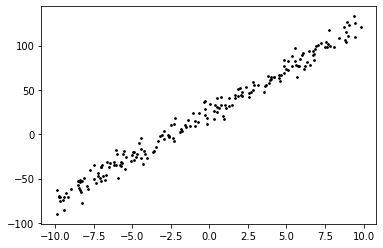

In [2]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]
num_data=len(x_data)

plt.scatter(x_data,y_data,c='k',s=3)

In [0]:
theta1=tf.Variable(tf.random_normal([1],name='weight'))
theta0=tf.Variable(tf.random_normal([1],name='bias'))
theta1_array=[]
theta0_array=[]
cost_array=[]

X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

## hypothesis X*theta1+theta0
H= X*theta1+theta0

In [0]:
##cost/loss function
cost=0.5*tf.reduce_mean(tf.square(H-Y))

##minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)


In [0]:
##launch the graph in a session
sess=tf.Session()

##initializes the graph in a session
sess.run(tf.global_variables_initializer())

#fit the line with new trainig data
for step in range(3001):
    sess.run(train,feed_dict={X:x_data, Y:y_data})
    cost_val=sess.run(cost,feed_dict={X:x_data, Y:y_data})
    theta1_val=sess.run(theta1,feed_dict={X:x_data, Y:y_data})
    theta0_val=sess.run(theta0,feed_dict={X:x_data, Y:y_data})
   # print(theta1_val)
    #theta1_array=theta1_array+theta1_val
    theta0_array.extend(theta0_val)
    theta1_array.extend(theta1_val)
    cost_array.append(cost_val)

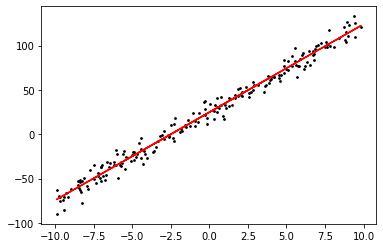

In [6]:
def fun_H(x):
    f=sess.run(theta1)*x+sess.run(theta0)
    return f
Y_plot=fun_H(x_data)

plt.scatter(x_data,y_data,color='black',s=3)
plt.plot(x_data,Y_plot,color='red')

In [0]:
def cost_fun(W,b):
  r=0
  for i in range(num_data):
    r=r+(b+W*x_data[i]-y_data[i])**2
  ans=1/(2*num_data)*r
  return ans

In [0]:
x_cost=np.arange(-30,30,0.1)
y_cost=np.arange(-30,30,0.1)
num=len(x_cost)

In [0]:
temp=np.zeros((num,num))


In [0]:
for i in range(num):
  for j in range(num):
    temp[j,i]=cost_fun(x_cost[i],y_cost[j])

In [0]:
from mpl_toolkits.mplot3d import Axes3D



In [0]:
xx,yy=np.meshgrid(x_cost,y_cost)

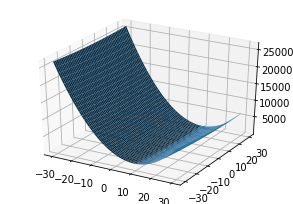

In [32]:
plt.figure(figsize=(5,3.5))
ax=plt.subplot(1,1,1,projection='3d')
ax.plot_surface(xx,yy,temp)
plt.show()

In [26]:
print(xx)

[[-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 ...
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]]
